In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

file_path = 'Indian_Food_Nutrition_Processed.csv' 
df = pd.read_csv(file_path)

# 1. แสดง 5 แถวแรกของข้อมูลเพื่อดูภาพรวม
print("--- 5 แถวแรกของข้อมูล ---")
print(df.head())

# 2. ดูขนาดของข้อมูล (จำนวนแถว, จำนวนคอลัมน์)
print("\n--- ขนาดของ DataFrame (แถว, คอลัมน์) ---")
print(df.shape)

# 3. ดูข้อมูลภาพรวมของแต่ละคอลัมน์ (ชื่อ, ชนิดข้อมูล, จำนวนข้อมูลที่ไม่ใช่ค่าว่าง)
print("\n--- ข้อมูลภาพรวมของแต่ละคอลัมน์ (Info) ---")
df.info()

# 4. ตรวจสอบข้อมูลที่ขาดหายไป (Missing Values) และค่าแปลกๆ
# ใน dataset นี้ ใช้ -1 และ 'NA' แทนค่าที่หายไป เราจะแปลงให้เป็นค่าว่าง (NaN) เพื่อให้ง่ายต่อการจัดการ
df = df.replace(-1, pd.NA)
df = df.replace('-1', pd.NA)

print("\n--- จำนวนข้อมูลที่ขาดหายไปในแต่ละคอลัมน์ ---")
print(df.isnull().sum())

--- 5 แถวแรกของข้อมูล ---
                     Dish Name  Calories (kcal)  Carbohydrates (g)  \
0         Hot tea (Garam Chai)            16.14               2.58   
1               Instant coffee            23.16               3.65   
2               Espreso coffee            51.54               6.62   
3                     Iced tea            10.34               2.70   
4  Raw mango drink (Aam panna)            35.92               9.05   

   Protein (g)  Fats (g)  Free Sugar (g)  Fibre (g)  Sodium (mg)  \
0         0.39      0.53            2.58       0.00         3.12   
1         0.64      0.75            3.62       0.00         4.92   
2         1.75      2.14            6.53       0.00        13.98   
3         0.03      0.01            2.70       0.00         0.23   
4         0.16      0.03            7.49       0.61        79.82   

   Calcium (mg)  Iron (mg)  Vitamin C (mg)  Folate (µg)  
0         14.20       0.02            0.50         1.80  
1         20.87       0.06  

--- ชื่อคอลัมน์ทั้งหมดใน DataFrame ---
Index(['Dish Name', 'Calories (kcal)', 'Carbohydrates (g)', 'Protein (g)',
       'Fats (g)', 'Free Sugar (g)', 'Fibre (g)', 'Sodium (mg)',
       'Calcium (mg)', 'Iron (mg)', 'Vitamin C (mg)', 'Folate (µg)'],
      dtype='object')
-----------------------------------
--- สถิติข้อมูลทางโภชนาการ ---
       Calories (kcal)  Carbohydrates (g)  Protein (g)     Fats (g)  \
count      1014.000000        1014.000000  1014.000000  1014.000000   
mean        233.735897          18.354004     4.753008    16.267584   
std         187.599467          16.745936     3.442746    20.452322   
min           6.610000           0.000000     0.000000     0.000000   
25%         101.180000           5.582500     2.100000     4.030000   
50%         174.920000          11.925000     3.990000     9.095000   
75%         315.845000          26.870000     6.602500    17.085000   
max         839.330000          86.530000    21.550000    90.450000   

       Free Sugar (g) 

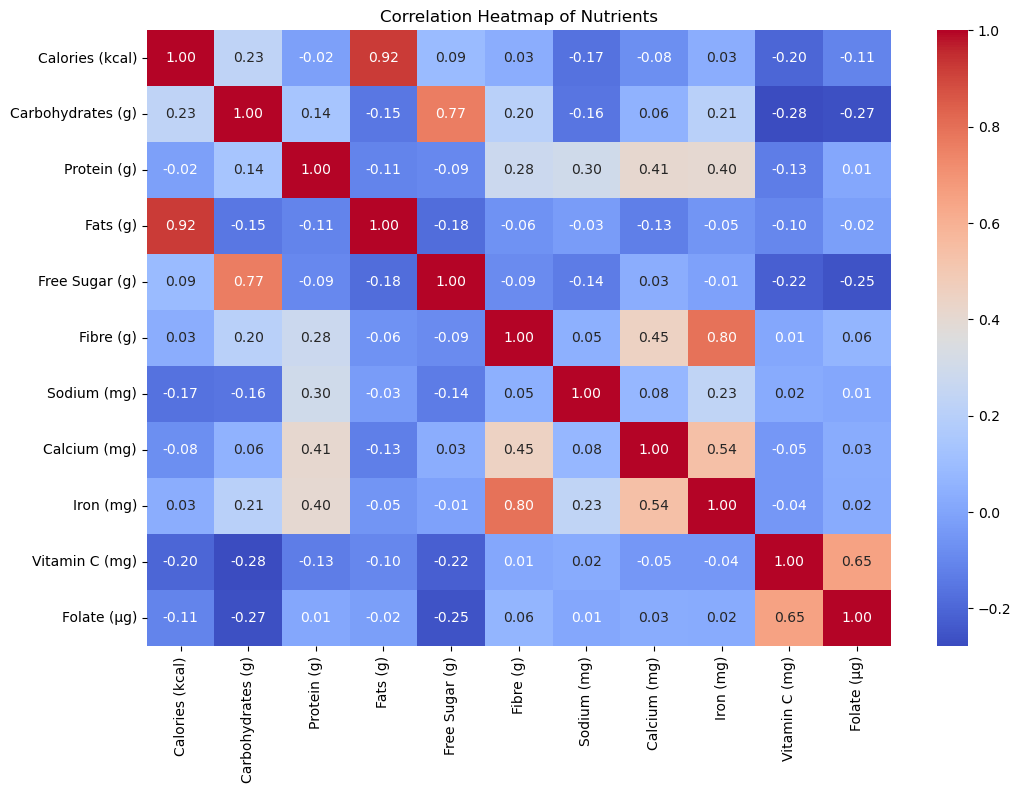

In [6]:
# พิมพ์ชื่อคอลัมน์ทั้งหมดเพื่อตรวจสอบ
print("--- ชื่อคอลัมน์ทั้งหมดใน DataFrame ---")
print(df.columns)
print("-" * 35)
# ----------------------------------------------------

# 1. แสดงสถิติพื้นฐาน
print("--- สถิติข้อมูลทางโภชนาการ ---")
print(df.describe())

# 2. หา 5 อันดับอาหารที่มีแคลอรี่สูงสุด
top_5_calories = df.nlargest(5, 'Calories (kcal)')
print("\n--- 5 อันดับอาหารแคลอรี่สูงสุด ---")
print(top_5_calories[['Dish Name', 'Calories (kcal)']])

# 3. หา 5 อันดับอาหารที่มีโปรตีนสูงสุด
top_5_protein = df.nlargest(5, 'Protein (g)')
print("\n--- 5 อันดับอาหารโปรตีนสูงสุด ---")
print(top_5_protein[['Dish Name', 'Protein (g)']])

# 4. สร้าง Heatmap ดูความสัมพันธ์ของสารอาหาร
plt.figure(figsize=(12, 8))
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Nutrients')
plt.show()

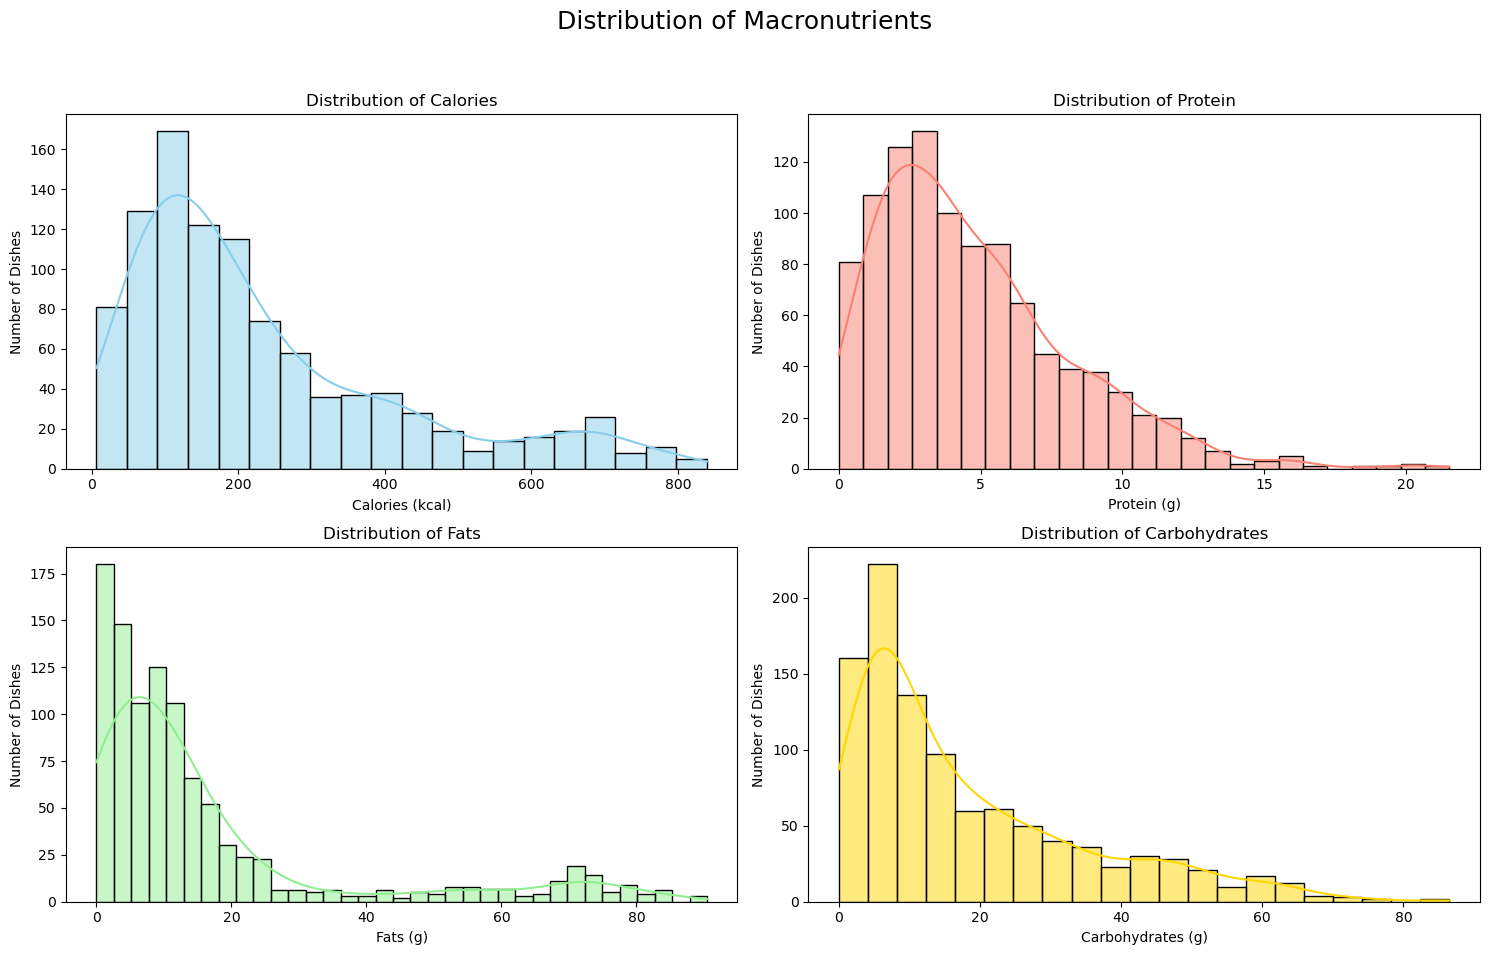


Generating relationship scatter plots...


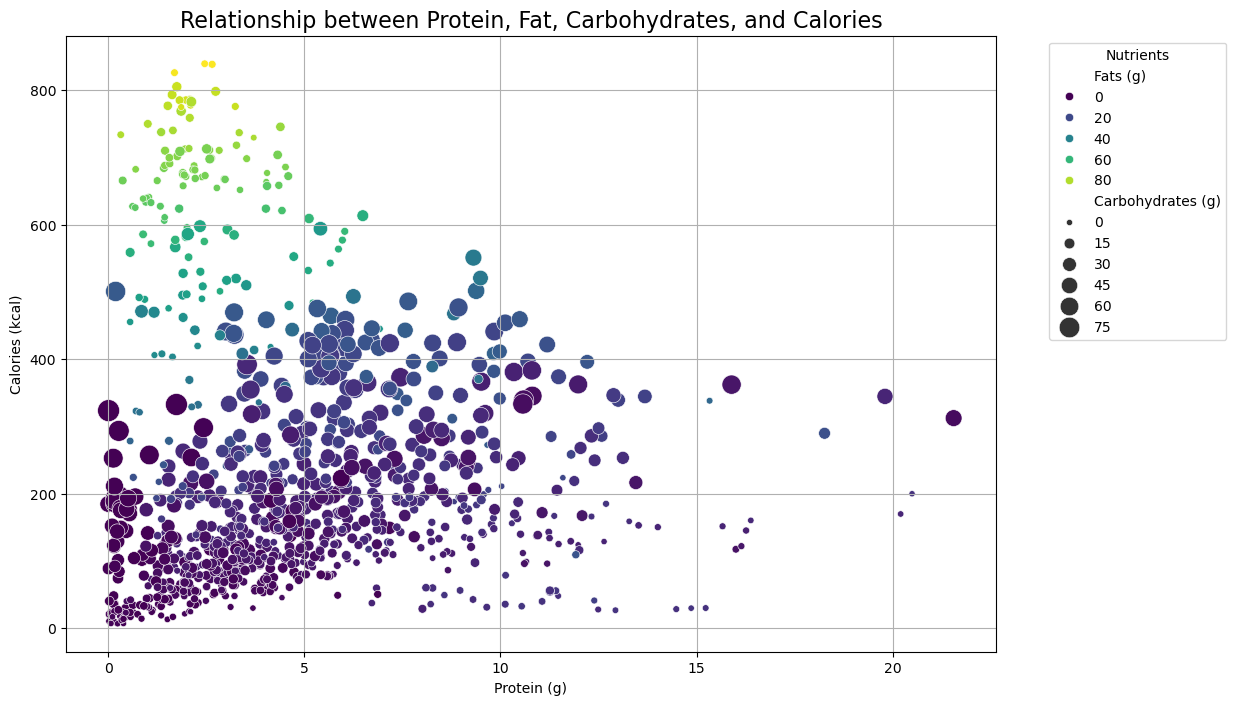


Generating ranking plots...


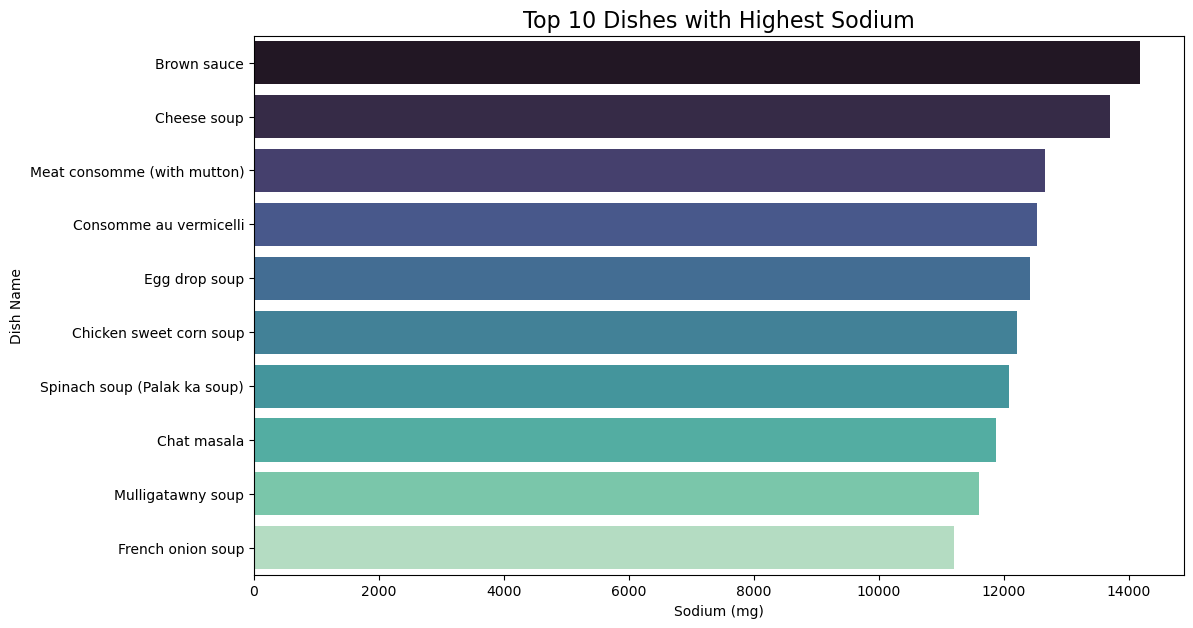

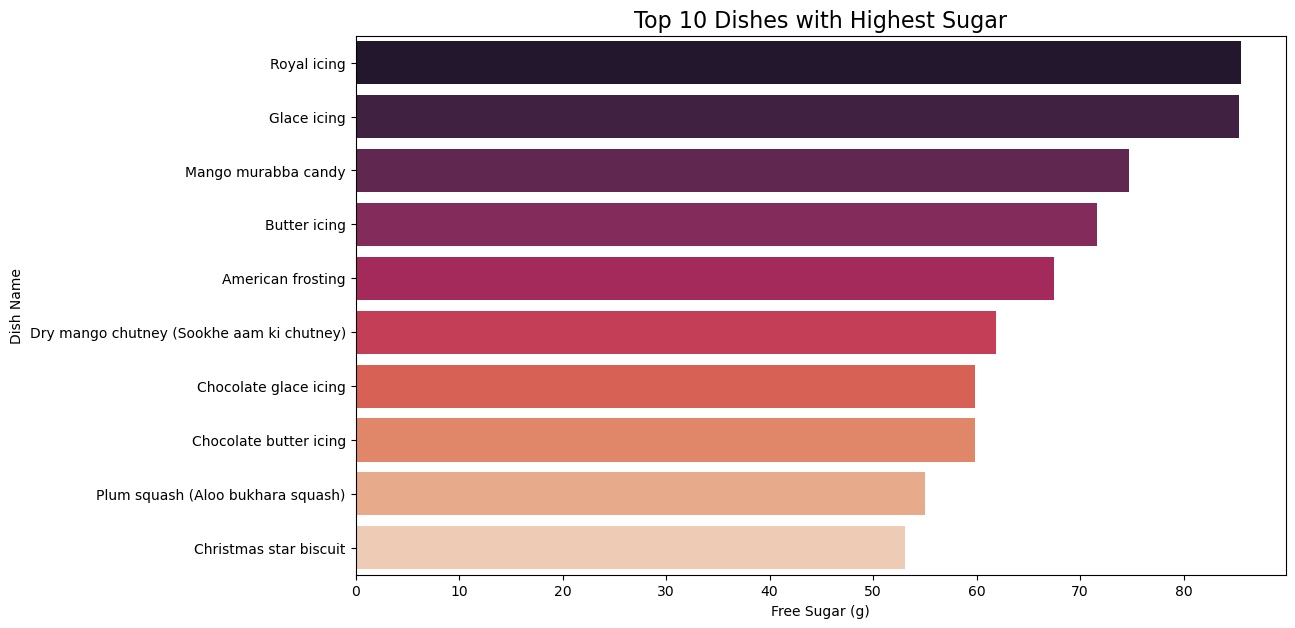


All plots generated successfully!


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# สมมติว่าข้อมูลของคุณอยู่ในตัวแปรชื่อ df
# df = pd.read_csv('your_file.csv') 

# --- 1. Distribution of Macronutrients ---
# Create histograms to see the distribution of key nutrients
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Macronutrients', fontsize=18)

sns.histplot(df['Calories (kcal)'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Calories')
axes[0, 0].set_xlabel('Calories (kcal)')
axes[0, 0].set_ylabel('Number of Dishes')

sns.histplot(df['Protein (g)'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of Protein')
axes[0, 1].set_xlabel('Protein (g)')
axes[0, 1].set_ylabel('Number of Dishes')

sns.histplot(df['Fats (g)'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribution of Fats')
axes[1, 0].set_xlabel('Fats (g)')
axes[1, 0].set_ylabel('Number of Dishes')

sns.histplot(df['Carbohydrates (g)'], kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribution of Carbohydrates')
axes[1, 1].set_xlabel('Carbohydrates (g)')
axes[1, 1].set_ylabel('Number of Dishes')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- 2. Relationship between Nutrients ---
# Create a scatter plot to observe correlations
print("\nGenerating relationship scatter plots...")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, 
    x='Protein (g)', 
    y='Calories (kcal)', 
    hue='Fats (g)',          # Color of points represents fat content
    size='Carbohydrates (g)',# Size of points represents carbohydrate content
    sizes=(20, 250),         # Range of point sizes
    palette='viridis'
)
plt.title('Relationship between Protein, Fat, Carbohydrates, and Calories', fontsize=16)
plt.xlabel('Protein (g)')
plt.ylabel('Calories (kcal)')
plt.legend(title='Nutrients', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# --- 3. Ranking Dishes ---
# Create bar charts to show dishes with the highest nutritional values
print("\nGenerating ranking plots...")
top_n = 10 # Number of top dishes to display

# Top 10 dishes with the highest sodium
top_sodium = df.nlargest(top_n, 'Sodium (mg)')
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_sodium, 
    x='Sodium (mg)', 
    y='Dish Name', 
    palette='mako',
    hue='Dish Name',      # <-- เพิ่มบรรทัดนี้
    legend=False          # <-- เพิ่มบรรทัดนี้
)
plt.title(f'Top {top_n} Dishes with Highest Sodium', fontsize=16)
plt.xlabel('Sodium (mg)')
plt.ylabel('Dish Name')
plt.show()

# Top 10 dishes with the highest sugar
top_sugar = df.nlargest(top_n, 'Free Sugar (g)')
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_sugar, 
    x='Free Sugar (g)', 
    y='Dish Name', 
    palette='rocket',
    hue='Dish Name',      # <-- เพิ่มบรรทัดนี้
    legend=False          # <-- เพิ่มบรรทัดนี้
)
plt.title(f'Top {top_n} Dishes with Highest Sugar', fontsize=16)
plt.xlabel('Free Sugar (g)')
plt.ylabel('Dish Name')
plt.show()

print("\nAll plots generated successfully!")

Project Proposal (Revised): "Nutri-Groups - A Data-Driven Framework for Healthy Indian Meal Planning"

1. Executive Summary (บทสรุปสำหรับผู้บริหาร)
โปรเจกต์นี้มีเป้าหมายเพื่อวิเคราะห์และจัดกลุ่มเมนูอาหารอินเดียตามโปรไฟล์ทางโภชนาการที่ละเอียด โดยใช้เทคนิค Unsupervised Machine Learning (Clustering) เพื่อแบ่งอาหารออกเป็นกลุ่มต่างๆ ที่มีลักษณะเฉพาะ เช่น "กลุ่มโปรตีนสูง-น้ำตาลต่ำ", "กลุ่มไฟเบอร์สูง-เสริมธาตุเหล็ก", หรือ "กลุ่มที่ควรระวังเรื่องโซเดียม" ผลลัพธ์ที่ได้จะเป็นเครื่องมือที่ทรงพลังสำหรับนักโภชนาการ, ผู้ที่ต้องการวางแผนมื้ออาหารเพื่อสุขภาพ, หรือแม้กระทั่งร้านอาหารที่ต้องการสร้างเมนูทางเลือกเพื่อสุขภาพ ซึ่งจะเปลี่ยนข้อมูลตัวเลขที่ซับซ้อนให้กลายเป็นองค์ความรู้ที่เข้าใจง่ายและนำไปใช้ได้จริง

2. In-depth Data Insights & Analysis (สรุปข้อมูลเชิงลึก)

จากการสำรวจข้อมูลเบื้องต้น (EDA) บนชุดข้อมูลชุดใหม่นี้ เราควรจะมุ่งเน้นไปที่:

    Correlation Heatmap: สร้าง Heatmap เพื่อดูความสัมพันธ์ระหว่างสารอาหารต่างๆ เราคาดว่าจะเห็นความสัมพันธ์ที่ชัดเจนระหว่าง:

        Calories กับ Fats, Carbohydrates, Protein (ความสัมพันธ์เชิงบวก)

        อาจจะมีความสัมพันธ์ที่น่าสนใจระหว่าง Iron กับ Vitamin C (วิตามินซีช่วยในการดูดซึมธาตุเหล็ก)


    Distribution Analysis: ตรวจสอบการกระจายตัวของสารอาหารแต่ละชนิด (Sodium, Free Sugar, Fats) เพื่อระบุว่าเมนูอาหารส่วนใหญ่มีค่าเหล่านี้อยู่ในเกณฑ์ที่ดีต่อสุขภาพหรือไม่ และมีกลุ่มอาหารที่เป็นค่าสุดโต่ง (Outliers) มากน้อยเพียงใด

        Action: การทำ Data Scaling เป็นขั้นตอนที่ สำคัญที่สุด สำหรับโปรเจกต์นี้ เนื่องจากหน่วยของข้อมูลแตกต่างกันมาก (เช่น kcal, g, mg, µg) การไม่ทำ Scaling จะทำให้โมเดล Clustering ถูกครอบงำโดยตัวแปรที่มีค่าสูงๆ (เช่น Sodium) และไม่ให้ความสำคัญกับตัวแปรที่มีค่าน้อยแต่สำคัญ (เช่น Iron)




3. Core Methodology: Unsupervised Clustering (หัวใจของโปรเจกต์: การจัดกลุ่ม)

นี่คือหัวใจหลักของโปรเจกต์ครับ เราจะใช้ Machine Learning เพื่อให้มัน "ค้นหา" กลุ่มอาหารที่มีลักษณะคล้ายกันให้เราโดยอัตโนมัติ

    Objective: แบ่งเมนูอาหารทั้งหมดออกเป็นกลุ่ม (Clusters) ที่มีความหมายทางโภชนาการ       โดยที่อาหารในกลุ่มเดียวกันมีโปรไฟล์สารอาหารคล้ายกัน และแตกต่างจากอาหารในกลุ่มอื่น

    Preprocessing Pipeline (สำคัญมาก):

        Select Features: เลือกเฉพาะคอลัมน์ที่เป็นตัวเลขทางโภชนาการทั้งหมด (ตั้งแต่ Calories ไปจนถึง Folate)

        Handle Missing Values: ตรวจสอบและจัดการข้อมูลที่หายไป (ถ้ามี) เช่น การแทนที่ด้วยค่าเฉลี่ยหรือค่ามัธยฐาน

        Data Scaling: ใช้ StandardScaler จาก Scikit-learn เพื่อปรับให้ทุกคอลัมน์มีค่าเฉลี่ยเป็น 0 และส่วนเบี่ยงเบนมาตรฐานเป็น 1 ทำให้ทุกตัวแปรมี "น้ำหนัก" เท่าเทียมกันในการคำนวณระยะห่าง


    Clustering Algorithm:

        K-Means Clustering: เป็นอัลกอริทึมที่นิยมและเข้าใจง่ายที่สุดในการเริ่มต้น

            Finding the Optimal 'k' (การหาจำนวนกลุ่มที่เหมาะสม): เราไม่สามารถเดาจำนวนกลุ่มที่ดีที่สุดได้ เราต้องใช้วิธีทางสถิติช่วย เช่น

            Elbow Method: พล็อตกราฟของค่า "Inertia" (ผลรวมของระยะทางกำลังสองภายในกลุ่ม) เทียบกับจำนวนกลุ่ม (k) และมองหาจุดที่กราฟเริ่มโค้งงอคล้าย "ข้อศอก"

            Silhouette Score: คำนวณคะแนนที่บ่งบอกว่าข้อมูลแต่ละจุดอยู่ใกล้กับกลุ่มของตัวเองแค่ไหนเมื่อเทียบกับกลุ่มอื่น (ค่าเข้าใกล้ 1 ยิ่งดี)


        (Optional Advanced Algorithm):

            DBSCAN: เหมาะสำหรับหา Cluster ที่มีรูปร่างแปลกๆ และสามารถระบุข้อมูลที่เป็น Noise หรือ Outliers ได้ดี

            Hierarchical Clustering: สร้างแผนภูมิต้นไม้ (Dendrogram) ที่แสดงให้เห็นลำดับชั้นของการรวมกลุ่ม ซึ่งมีประโยชน์ในการทำความเข้าใจความสัมพันธ์ระหว่างกลุ่มย่อยๆ






4. Interpretation & Visualization (การตีความผลลัพธ์และการนำเสนอ)

การสร้างโมเดล Clustering เป็นเพียงครึ่งทาง การตีความผลลัพธ์คือส่วนที่สร้าง "Value" ให้กับโปรเจกต์


    Cluster Profiling:

        หลังจากได้กลุ่มแล้ว ให้คำนวณค่าเฉลี่ยของสารอาหารแต่ละชนิดในแต่ละกลุ่ม

        สร้างตารางสรุป หรือ "เรดาร์ชาร์ต (Radar Chart)" เพื่อเปรียบเทียบโปรไฟล์ของแต่ละกลุ่มอย่างชัดเจน

        ตั้งชื่อกลุ่มตามลักษณะเด่น: เช่น

            Cluster 1: "High-Protein Power Meals" (มีโปรตีนและธาตุเหล็กสูง แต่ไขมันต่ำ)

            Cluster 2: "Energy Boosters" (มีคาร์โบไฮเดรตและแคลอรี่สูง 
            เหมาะสำหรับผู้ที่ต้องการพลังงาน)

            Cluster 3: "Heart-Healthy Choices" (โซเดียมและไขมันต่ำ ไฟเบอร์สูง)

            Cluster 4: "Caution Zone: High Sugar/Sodium" (เป็นกลุ่มที่ควรบริโภคแต่น้อย)

    Visualization for Understanding:

        Principal Component Analysis (PCA): เนื่องจากเรามีตัวแปรหลายมิติ (11 มิติ) การพล็อตลงบนกราฟ 2 มิติเป็นไปไม่ได้โดยตรง เราจะใช้ PCA เพื่อลดมิติของข้อมูลลงเหลือ 2 หรือ 3 มิติหลัก โดยที่ยังคงรักษาความแปรปรวนของข้อมูลไว้ให้ได้มากที่สุด

        Scatter Plot: นำผลลัพธ์จาก PCA (PC1 และ PC2) มาพล็อตเป็น Scatter Plot แล้วลงสีจุดตาม Cluster ที่โมเดลจัดกลุ่มไว้ จะทำให้เราเห็นภาพการแบ่งกลุ่มของข้อมูลอย่างชัดเจน




5. Project Execution Plan & Deliverables (แผนการดำเนินงานและผลลัพธ์)


    Phase 1: EDA & Preprocessing (1 สัปดาห์)

        สร้าง Heatmap, Distribution Plots และทำความเข้าใจข้อมูล

        สร้าง Data Cleaning และ Scaling Pipeline



    Phase 2: Clustering Model Development (1-2 สัปดาห์)

        ใช้ Elbow Method/Silhouette Score เพื่อหาค่า k ที่เหมาะสม

        ฝึกโมเดล K-Means (และอาจจะลอง DBSCAN เพื่อเปรียบเทียบ)
        
        ลดมิติข้อมูลด้วย PCA เพื่อเตรียมการสำหรับ Visualization



    Phase 3: Analysis & Visualization (1 สัปดาห์)

        ทำการ Profiling และตั้งชื่อให้แต่ละ Cluster

        สร้าง Scatter Plot จาก PCA เพื่อแสดงผลการจัดกลุ่ม

        สร้าง Radar Charts หรือ Bar Charts เพื่อเปรียบเทียบโปรไฟล์ของแต่ละ Cluster



    Phase 4: Deployment & Reporting (1-2 สัปดาห์)

        Deliverable: สร้าง Interactive Dashboard ด้วย Streamlit หรือ Dash ที่มีฟังก์ชันดังนี้:

            "Explore the Clusters": หน้าที่แสดงผลการจัดกลุ่มด้วยกราฟ PCA 
            และให้ผู้ใช้สามารถคลิกดูโปรไฟล์และรายชื่ออาหารในแต่ละกลุ่มได้

            "Find Your Meal": หน้าที่ให้ผู้ใช้สามารถ Filter หรือค้นหาอาหารตามกลุ่มที่สนใจ เช่น 
            "ขอดูเมนูในกลุ่มโปรตีนสูงทั้งหมด"


        Report: จัดทำสรุปในรูปแบบ Jupyter Notebook หรือ Presentation ที่อธิบายกระบวนการทั้งหมดตั้งแต่ต้นจนจบ พร้อมทั้ง Insights ที่ค้นพบ และข้อเสนอแนะในการนำไปใช้ประโยชน์


